In [1]:
import pandas as pd
beer = pd.read_csv('beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
X = beer[["calories","sodium","alcohol","cost"]]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


In [3]:
from sklearn.cluster import KMeans
# 分别取3个和2个质心的情况
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)
km.labels_ # 每个样本点对应的分类

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2])

In [9]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
10,Coors,140,18,4.6,0.44,0,1


In [10]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,1
1,70.00,10.5,2.600000,0.420000,0
2,102.75,10.0,4.075000,0.440000,0


In [12]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.666667
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [13]:
centers = beer.groupby('cluster').mean().reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,1
1,1,70.00,10.5,2.600000,0.420000,0
2,2,102.75,10.0,4.075000,0.440000,0


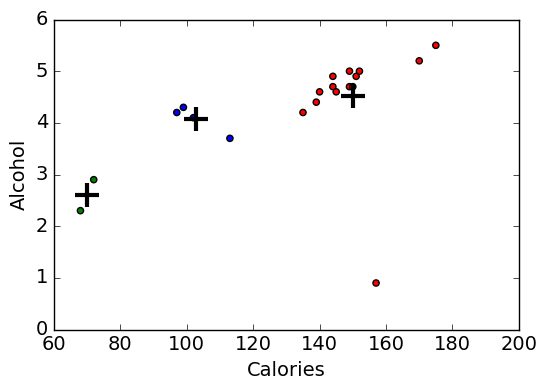

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue', 'yellow'])
# 数据分布三点图
plt.scatter(beer['calories'], beer['alcohol'], c=colors[beer['cluster']]) 
# 关于 calories alcohol 的三个类的平均值分布
plt.scatter(centers.calories, centers.alcohol, linewidth=3, marker='+', s=300, c='black') 

plt.xlabel('Calories')
plt.ylabel('Alcohol')

In [15]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

cluster_centers = km.cluster_centers_
cluster_centers_2 = km2.cluster_centers_

print (cluster_centers)
print (cluster_centers_2)

[[150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]
 [102.75        10.           4.075        0.44      ]]
[[ 91.83333333  10.16666667   3.58333333   0.43333333]
 [150.          17.           4.52142857   0.52071429]]


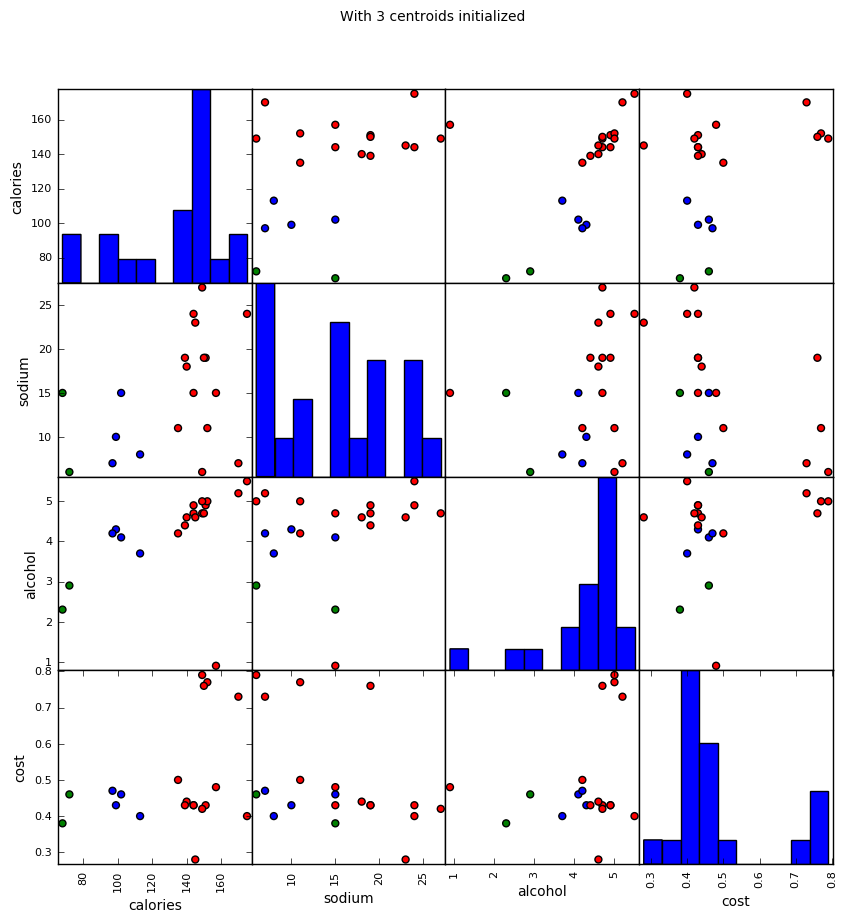

In [16]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

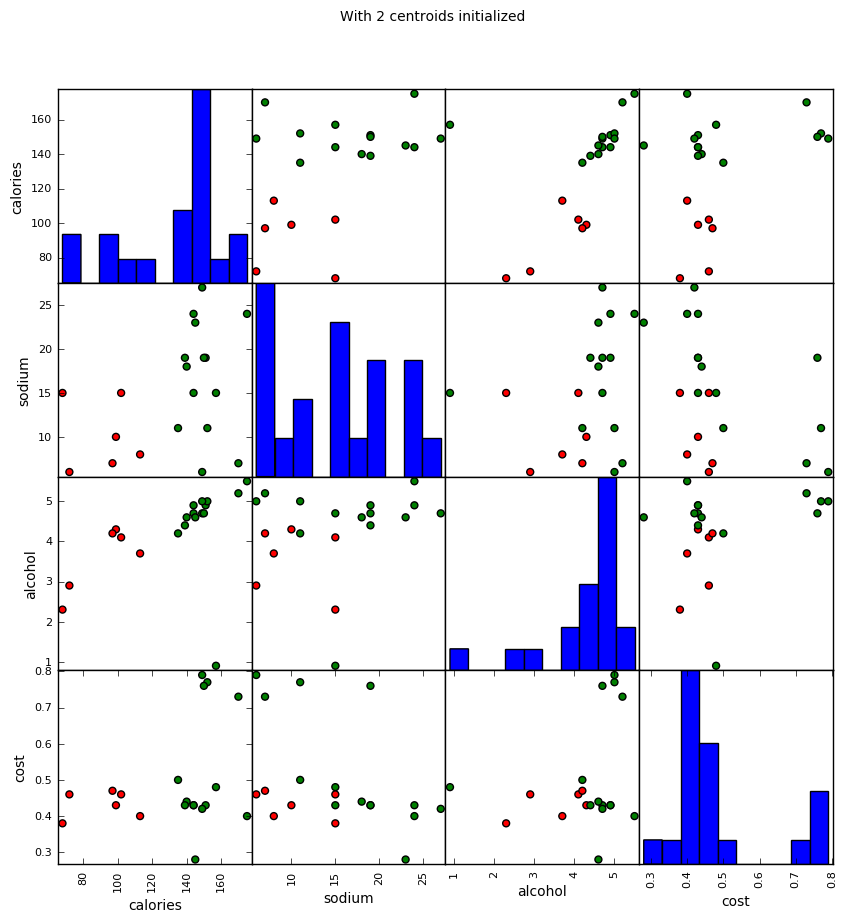

In [17]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [19]:
km = KMeans(n_clusters=3).fit(X_scaled)
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
9,Budweiser_Light,113,8,3.7,0.40,2,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0
11,Coors_Light,102,15,4.1,0.46,2,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0,0
8,Miller_Lite,99,10,4.3,0.43,2,0,0
19,Schlitz_Light,97,7,4.2,0.47,2,0,0
2,Lowenbrau,157,15,0.9,0.48,0,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1,1


In [21]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,105.375,10.875,3.3250,0.4475,1.25,0.25
1,148.375,21.125,4.7875,0.4075,0.00,1.00
2,155.250,10.750,4.9750,0.7625,0.00,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249FD3200B8>,
      dtype=object)

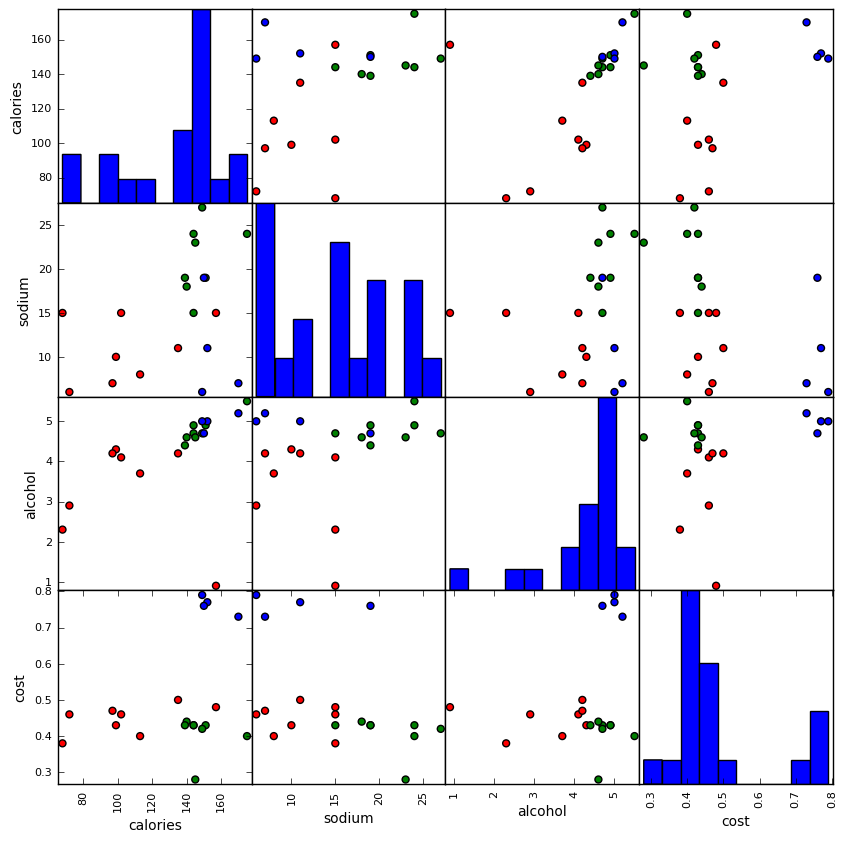

In [22]:
pd.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

聚类评估：轮廓系数（Silhouette Coefficient ）





计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}
si接近1，则说明样本i聚类合理
si接近-1，则说明样本i更应该分类到另外的簇
若si 近似为0，则说明样本i在两个簇的边界上。


In [23]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)

0.1797806808940007 0.6731775046455796


In [24]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.32472080133848924,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

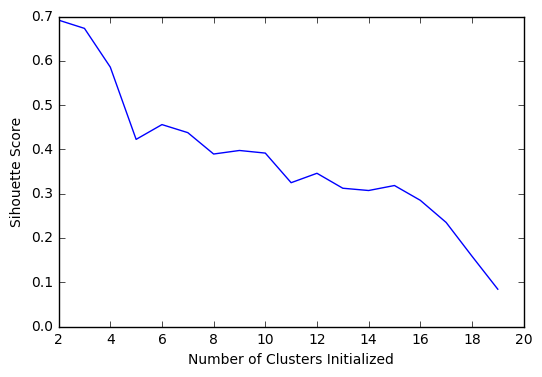

In [25]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X) #eps 半径 min_samples 最小密度
labels = db.labels_
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,2,0,0,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,1,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,1,0
16,Hamms,139,19,4.4,0.43,0,1,1,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0,0
10,Coors,140,18,4.6,0.44,0,1,1,0
0,Budweiser,144,15,4.7,0.43,0,1,1,0


In [27]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,1.083333
1,99.333333,10.666667,4.200000,0.453333,2.000000,0.000000,0.000000
2,70.000000,10.500000,2.600000,0.420000,1.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249FDBA0908>,
      dtype=object)

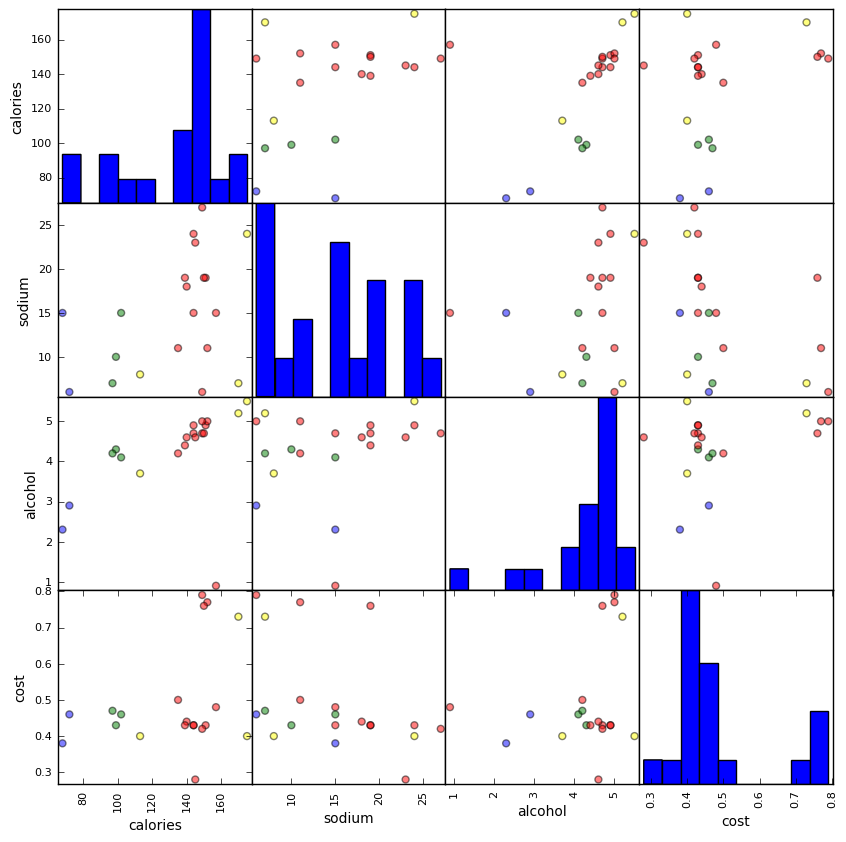

In [28]:
pd.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)

In [29]:
db = DBSCAN(eps=10, min_samples=2).fit(X) #eps 半径 min_samples 最小密度
labels = db.labels_
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,2,0,0,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,1,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,1,0
16,Hamms,139,19,4.4,0.43,0,1,1,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0,0
10,Coors,140,18,4.6,0.44,0,1,1,0
0,Budweiser,144,15,4.7,0.43,0,1,1,0


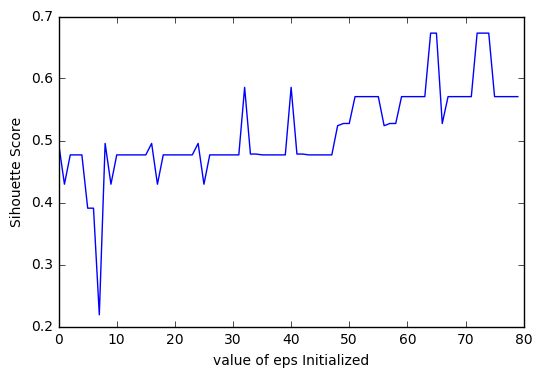

In [30]:
scores=[]
counter=0
for eps in range(10,20):
    for min_samples in range(2,10):
        labels=DBSCAN(eps,min_samples).fit(X).labels_
        score=metrics.silhouette_score(X,labels)
        scores.append(score)
        counter+=1
# scores
counter
plt.plot((range(0,80)), scores)
plt.xlabel("value of eps Initialized")
plt.ylabel("Sihouette Score")